In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from scipy.stats import pearsonr



In [2]:
def normal_by_row(data):

    # 计算每列的均值和标准差
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    # 标准化数据
    data_standardized = (data - mean) / mean
    return data_standardized

In [3]:
x_train_normal_vol.min()

NameError: name 'x_train_normal_vol' is not defined

In [4]:
def normal_by_row_log(data):

    # 计算每列的均值和标准差
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    # 标准化数据
    data_standardized = np.log10(data)
    return data_standardized

In [5]:
x_train = np.load("sh510050_train.npy")
x_train_normal = normal_by_row(x_train)

In [6]:
x_train_vol = np.load("sh510050_train_vol.npy")
x_train_normal_vol = normal_by_row_log(x_train_vol)/15

In [7]:
x_train_normal.mean(), x_train_normal.std()

(4.41665421108424e-19, 0.013090787922657068)

In [8]:
plt.hist(x_train_normal.ravel(), bins=100)

NameError: name 'plt' is not defined

(array([  1716.,   1725.,   1290.,   1728.,    432.,   1289.,   2160.,
             0.,   2160.,   1720.,   2963.,   2440.,   2433.,   5316.,
          4451.,   7776.,   5768.,   3926.,   6048.,  10060.,  14540.,
         15787.,  15109.,  21595.,  31183.,  26148.,  25887.,  24309.,
         42862.,  39101.,  50714.,  59144.,  64426.,  82724., 101440.,
        100840., 109338., 123272., 131110., 137505., 157977., 163955.,
        191586., 195608., 216557., 235036., 217025., 245206., 236408.,
        243968., 257388., 256194., 236991., 242943., 245948., 245994.,
        235745., 219520., 212324., 212968., 197753., 168134., 166749.,
        154741., 137090., 136120., 134705., 113349.,  99400., 108967.,
         86344.,  83579.,  67974.,  61763.,  54797.,  50507.,  46626.,
         42368.,  35795.,  33601.,  26167.,  20059.,  19633.,  25942.,
         14613.,  11516.,  11645.,   7035.,   4556.,   4648.,   6048.,
          3024.,   2160.,   1728.,   1296.,    432.,    432.,    432.,
      

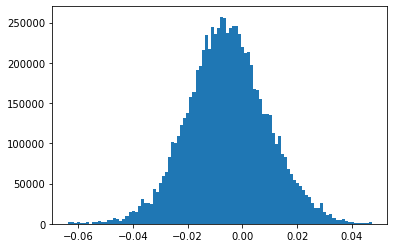

In [97]:
plt.hist(x_train_normal_vol.ravel(), bins=100)

In [98]:
x_train_normal_vol.mean(), x_train_normal_vol.std()

(-0.0055251107016699675, 0.014624359287024406)

In [64]:
x_train_normal_vol.

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [128]:
a = np.array([1,2,3,4,5])
a[[1,3,4]]

array([2, 4, 5])

In [99]:
def fibonacci(n):
    """
    生成长度为n的斐波那契数列
    """
    if n == 0:
        return []
    elif n == 1:
        return [0]
    else:
        fib = [0, 1]
        while len(fib) < n:
            fib.append(fib[-1] + fib[-2])
        return fib

In [108]:
choose = (432 - np.array(fibonacci(15)))[1:][::-1]
choose

array([ 55, 199, 288, 343, 377, 398, 411, 419, 424, 427, 429, 430, 431,
       431])

In [112]:
list(range(-1, 480, 48))

[-1, 47, 95, 143, 191, 239, 287, 335, 383, 431, 479]

In [69]:
choose = [ 55, 199, 288, 343, 377, 398, 411, 419, 424,426, 427,428, 429, 430, 431]

In [70]:
x_train_normal[0][choose]

array([ 0.00990794, -0.00865487, -0.01537392,  0.00307501,  0.00267642,
        0.01127453,  0.01281194,  0.01036347,  0.010819  ,  0.01098983,
        0.01110371,  0.01133147,  0.01155924,  0.01184394,  0.01235641])

In [71]:
x_train_normal_sample = x_train_normal[::, choose]

In [72]:
len(x_train_normal_vol_sample)

18278

In [73]:
x_train_normal_vol_sample = x_train_normal_vol[::, choose]

In [74]:
merge = np.concatenate((x_train_normal_sample, x_train_normal_vol_sample), axis=1)

In [14]:
len(merge[1])

30

In [ ]:
# # 计算协方差矩阵
# cov_mat = np.cov(x_train_normal)

# # 计算特征值和特征向量
# eig_vals, eig_vecs = np.linalg.eig(cov_mat)



In [13]:
len(eig_vecs)

432

In [11]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np

In [14]:
from sklearn.manifold import TSNE 

In [75]:
n_components = 30
rpca = PCA(n_components=n_components, svd_solver='randomized')
X_rpca = rpca.fit(merge)

In [76]:
train_pca =  X_rpca.transform(merge)

In [ ]:
tsne = TSNE(n_components=30, perplexity=50, learning_rate="auto", init="pca", random_state=42,method='exact',  metric="cosine", square_distances=True)
X_tsne = tsne.fit(merge)

In [1]:
tsne_trans = X_tsne.fit_transform(merge)

NameError: name 'X_tsne' is not defined

In [118]:
tsne_trans

array([[ 67.885284 ,  20.806858 ],
       [ 67.97915  ,  20.809639 ],
       [ 68.097046 ,  20.7618   ],
       ...,
       [-89.38726  , -15.1070595],
       [-89.55038  , -14.963725 ],
       [-89.73703  , -14.80072  ]], dtype=float32)

In [353]:
X_rpca.components_[23]

array([ 6.55170919e-04,  5.60068214e-04,  5.25043230e-04,  8.12933162e-04,
       -5.46395953e-05, -4.42808731e-03,  4.85603262e-02, -2.47387261e-01,
        6.24860719e-01, -4.03308132e-01, -4.51594796e-01, -1.34253213e-01,
        2.84017361e-01,  2.84017361e-01,  7.89372915e-06,  7.46382930e-05,
       -7.68129492e-05, -6.50205776e-05,  1.36977525e-05,  3.34022048e-04,
       -6.01604459e-04,  1.16567618e-03, -2.68625421e-03,  2.95984271e-03,
       -2.28769271e-04, -5.89945124e-04, -1.51964488e-04, -1.51964488e-04])

In [349]:
X_rpca.explained_variance_ratio_[:6]

array([0.43869855, 0.10827381, 0.090696  , 0.07132324, 0.05982264,
       0.05105894])

In [17]:
import matplotlib.pyplot as plt

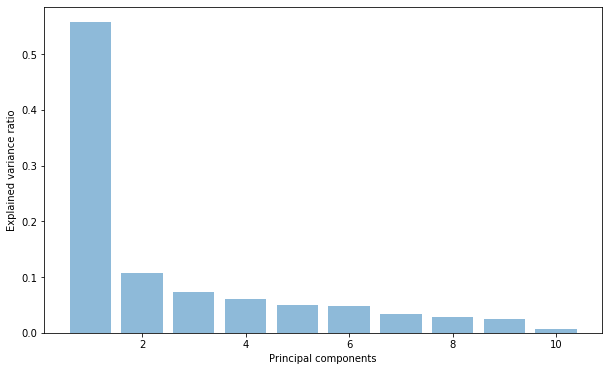

In [305]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), X_rpca.explained_variance_ratio_[:10], alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [33]:
len(train_pca[::6, 0])

3047

In [22]:
pct_change = np.load("sh510050_pct_change.npy")

In [206]:
pct_change[:,1]

array([-0.01034929, -0.01046708, -0.00963326, ..., -0.00221203,
       -0.00082001,  0.00114895])

In [31]:
color_d = pct_change[::,1]

In [30]:
color_d

array([[-0.002     , -0.002     , -0.002     , -0.002     ],
       [-0.002     , -0.002     , -0.002     , -0.002     ],
       [-0.002     , -0.002     , -0.002     , -0.002     ],
       ...,
       [-0.002     , -0.002     ,  0.002     , -0.002     ],
       [-0.00180402, -0.00082001,  0.002     , -0.00147601],
       [-0.00123102,  0.00114895,  0.002     , -0.00098482]])

In [144]:
color_d[color_d >0.002] = 0.002
color_d[color_d <-0.002] = -0.002

In [29]:
train_pca[1]

array([ 4.66601965e-01, -7.05579400e-02, -6.25966520e-03,  3.57637007e-02,
        1.20332234e-02,  3.05854462e-02,  2.37663471e-02,  7.32689637e-02,
        5.66114618e-02, -9.37917004e-03, -2.20006861e-02,  1.42185865e-02,
       -5.70723202e-03, -5.14477461e-03,  6.47303251e-03, -3.01856218e-03,
       -5.65585021e-03,  4.85043519e-03,  1.33669535e-03, -3.62098024e-03,
        6.87827570e-04,  1.67447074e-04,  3.81360893e-03,  2.87828498e-04,
        5.06797825e-04,  1.21036772e-04, -3.31579050e-04,  2.13891348e-04,
       -2.51563693e-04, -1.27532505e-04])

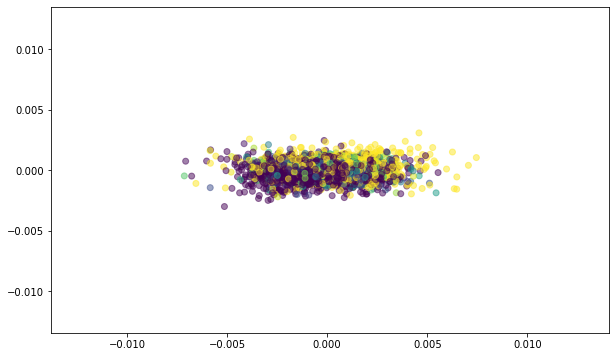

In [79]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))

# colors = np.stack((np.linspace(1, 0, len(color_d)), np.linspace(0, 1, len(color_d)), np.zeros(len(color_d))), axis=1)
# cmap = ListedColormap(colors)
plt.scatter(train_pca[::, 23], train_pca[::,26], c=color_d, alpha=0.5,  label='Original Data')
plt.show()

In [133]:
for p in range(30):
    pct_changec = pct_change[::,0]
    pca = train_pca[:, p]
    a = pearsonr(pct_changec, pca)
    print(p, a)

0 (0.004074383409002654, 0.5817669588429117)
1 (-0.02580277526010609, 0.0004852335884580538)
2 (-0.0009166857037188289, 0.9013755043476996)
3 (-0.02656210046032643, 0.00032880308618309453)
4 (-0.011286918730092901, 0.12703670361253064)
5 (-0.012789660892564352, 0.0837973875669251)
6 (-0.01001705677366038, 0.1756697400149369)
7 (-0.03477762039641794, 2.564901940279452e-06)
8 (0.010746536589130424, 0.14627012778841925)
9 (0.03297110280765272, 8.25453936128014e-06)
10 (-0.02102927205156703, 0.004466350519174271)
11 (-0.015428911890489585, 0.03698668252974495)
12 (0.022420387538595522, 0.0024348393525728713)
13 (-0.017692102712776554, 0.016760136796719432)
14 (-0.046845145825349294, 2.3530426953937936e-10)
15 (0.032334392963485926, 1.2292765166137733e-05)
16 (-0.005834486930589457, 0.43025640859206615)
17 (-0.037416055149092846, 4.1940502908558605e-07)
18 (-0.002950283284035028, 0.6900107023299985)
19 (0.09833005332450497, 1.651075093277053e-40)
20 (-0.10472992740990318, 9.53868291094022e-

In [56]:
pearsonr([1,2,3], [3,2,1])

(-0.9999999999999998, 1.3415758552508151e-08)

In [6]:
# 选择主成分
k = 3
top_k_eig_vecs = eig_vecs[:, :k]

# 降维
reduced_data = np.dot(x_train_normal, top_k_eig_vecs)

# 计算相似度
similarity = cosine_similarity(reduced_data)

NameError: name 'eig_vecs' is not defined

In [5]:
reduced_data

array([[ 8.29116198e-03, -4.82971423e-01, -3.54355172e-01],
       [ 2.18809134e-01,  1.39651847e-01, -4.01262370e-01],
       [-2.78288019e-01, -2.34011700e-01,  7.79249184e-01],
       [ 1.35143736e-01, -2.01581975e-01, -5.53358035e-02],
       [-9.52962321e-02,  3.51286041e-01,  4.32517754e-01],
       [-3.87886124e-02, -3.65999490e-01,  1.04915588e-01],
       [-1.56220598e-01,  4.00889071e-01, -6.09159029e-02],
       [ 3.22580439e-01,  1.05422035e-01,  2.76741821e-01],
       [ 3.24281193e-01,  4.41826852e-01,  2.53102352e-01],
       [ 4.77003796e-01,  8.37052656e-03,  4.49937130e-02],
       [-7.14328397e-02,  3.14200632e-02,  7.65627941e-02],
       [-3.02844709e-01, -4.43036745e-01,  5.46573014e-03],
       [ 3.39694628e-01,  2.65072754e-01,  3.00682573e-01],
       [ 2.17732141e-01,  1.51513849e-01, -5.17288178e-01],
       [-4.87876553e-02,  1.73791606e-01, -2.13813736e-01],
       [ 6.46713198e-01, -2.42631655e-02, -2.62269392e-01],
       [-1.63127701e-01, -4.75528138e-01

In [39]:
from sklearn.linear_model import LinearRegression

In [136]:
X = x_train_normal_sample[:,7:]
y = pct_change[::,0]

# 假设X和y已经准备好了
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [23]:
model

LinearRegression()

In [137]:
coefficients = model.coef_
intercept = model.intercept_

In [138]:
coefficients, intercept

(array([ 0.0182333 , -0.17768996,  0.24949573,  0.13374734, -0.01713003,
        -0.11909352, -1.20124979,  1.11320827]),
 -7.926184399736805e-05)

In [141]:
y_pre = model.predict(X)

In [142]:
y_pre

array([ 0.00037126, -0.00081195, -0.00138535, ..., -0.00094886,
       -0.00091597, -0.00070646])

In [143]:
pearsonr(y_pre, pct_change[::,0])

(0.4140887790796207, 0.0)

In [145]:
pct_change[::,3][y_pre<-0.01].mean()

/tmp/ipykernel_688265/3220487245.py:1: RuntimeWarning: Mean of empty slice.
  pct_change[::,3][y_pre<-0.01].mean()
/home/liubinxu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [64]:
len(pct_change[::,3][y_pre<-0.003])

642

In [55]:
import pandas as pd

In [56]:
ch50 = pd.read_table("ch50_choose", sep="\t", header=0)

In [57]:
ch50["my_pca_linermodel"] = y_pre

In [72]:
ch50.to_csv("ch50_liner.tsv", sep="\t", header=True)

In [68]:
ch50["stra"] = "NNNN"

In [69]:
ch50["stra"][y_pre<-0.003] = "end"

/tmp/ipykernel_594644/584670683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch50["stra"][y_pre<-0.003] = "end"


In [70]:
ch50["stra"][y_pre>0.005] = "start"

/tmp/ipykernel_594644/681559223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch50["stra"][y_pre>0.005] = "start"


In [78]:
ch50[ch50["stra"] == "start"]["hour"].value_counts()

9     50
10    35
13    22
11     8
14     7
Name: hour, dtype: int64

测试数据

In [91]:
x_test = np.load("sh510050_test.npy")
x_test_normal = normal_by_row(x_test)
x_test_vol = np.load("sh510050_test_vol.npy")
x_test_normal_vol = normal_by_row_log(x_test_vol)/5
x_test_normal_sample = x_test_normal[::, choose]
x_test_normal_vol_sample = x_test_normal_vol[::, choose]
merge_test = np.concatenate((x_test_normal_sample, x_test_normal_vol_sample), axis=1)

PCA

In [99]:
test_pca = X_rpca.transform(merge_test)

In [94]:
test_pca

array([[ 4.68378737e-01, -6.75950100e-02,  1.78791282e-04, ...,
        -7.49557495e-05,  6.86979225e-05,  1.04570507e-05],
       [ 4.66601965e-01, -7.05579400e-02, -6.25966520e-03, ...,
         2.13891348e-04, -2.51563693e-04, -1.27532505e-04],
       [ 4.71864904e-01, -6.33747116e-02, -1.01568734e-02, ...,
         3.32393348e-04,  1.22564727e-05,  1.13017748e-04],
       ...,
       [-3.55408516e-01, -5.74097426e-02,  3.15679847e-02, ...,
         1.58340019e-04, -1.12594607e-04, -9.60561764e-07],
       [-3.58606698e-01, -5.96576411e-02,  3.59035297e-02, ...,
         5.63649600e-05,  8.69890197e-05,  2.60781050e-05],
       [-3.64763646e-01, -6.22313958e-02,  4.00794572e-02, ...,
        -1.73868440e-04, -3.34489512e-06, -3.26656227e-05]])

In [95]:
pct_change_test = np.load("sh510050_pct_change_test.npy")

In [100]:
len(test_pca)

4570

In [101]:
for p in range(30):
    pct_changec = pct_change_test[::,0]
    pca = test_pca[:, p]
    a = pearsonr(pct_changec, pca)
    print(p, a)

0 (-0.07390420509972977, 5.687736208111391e-07)
1 (0.08237799208356646, 2.4490531679598452e-08)
2 (-0.018607955342081543, 0.20850187122298347)
3 (-0.05486248731460648, 0.0002067836449043142)
4 (0.09125032826643414, 6.414518044738184e-10)
5 (-0.06549492113801793, 9.374503088603102e-06)
6 (0.05705473560600015, 0.0001138100649431102)
7 (0.022841774920625574, 0.12260685709912364)
8 (-0.012140704000962647, 0.41190898444499163)
9 (0.03906619205003099, 0.008260569603529779)
10 (0.021255585062109044, 0.15080766099677695)
11 (-0.0004785352711537945, 0.9742001241049517)
12 (0.02701515919318683, 0.06783423862708651)
13 (0.09481114438208604, 1.3439032894269488e-10)
14 (0.031008132748594208, 0.03607018185832214)
15 (-0.027129948518488104, 0.06667351768937281)
16 (-0.014531855213216, 0.3260198838097447)
17 (-0.04831697524337221, 0.001085678055975091)
18 (0.08662021807179034, 4.488497214047134e-09)
19 (-0.037002880858471976, 0.012362206482069975)
20 (-0.012125230182729084, 0.4125052082408222)
21 (0.1

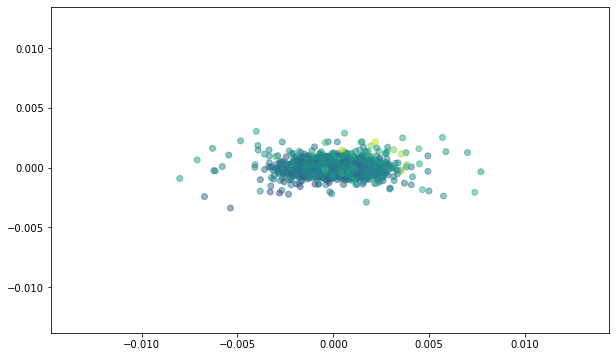

In [109]:

plt.figure(figsize=(10, 6))

# colors = np.stack((np.linspace(1, 0, len(color_d)), np.linspace(0, 1, len(color_d)), np.zeros(len(color_d))), axis=1)
# cmap = ListedColormap(colors)
plt.scatter(test_pca[::, 25], test_pca[::,26], c=pct_change_test[::,2], alpha=0.5,  label='Original Data')
plt.show()